In [1]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

In [2]:
from pixel3d import Pixel3D

In [3]:
from topologicalunionfind import TopologicalUnionFind

### Reading Slice

In [4]:
binary = np.fromfile('../cube/map.bin')
binary.shape

(87464,)

In [5]:
cube_shape = (26, 29, 116)

In [6]:
cube = binary.reshape(cube_shape)
cube.shape

(26, 29, 116)

### Counting Number of Islands

In [7]:
import sys
sys.setrecursionlimit(10000)

In [8]:
adata = (cube != 0) * 1
adata.shape

(26, 29, 116)

In [9]:
def numIslands(grid):
    nIslands = 0
    nx = grid.shape[0]
    ny = grid.shape[1]
    nz = grid.shape[2]
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                if DFSsearch(grid, i, j, k):
                    nIslands += 1
    return nIslands

In [10]:
def DFSsearch(grid, x, y, z):

    if (grid[x][y][z] == 0):
        return False
    
    grid[x][y][z] = 0
    nx = grid.shape[0]
    ny = grid.shape[1]
    nz = grid.shape[2]
    if (x != 0 and grid[x-1][y][z] == 1):
        DFSsearch(grid, x-1, y, z)
    if (x != nx-1 and grid[x+1][y][z] == 1):
        DFSsearch(grid, x+1, y, z)
    if (y != 0 and grid[x][y-1][z] == 1):
        DFSsearch(grid, x, y-1, z)
    if (y != ny-1 and grid[x][y+1][z] == 1):
        DFSsearch(grid, x, y+1, z)
    if (z != 0 and grid[x][y][z-1] == 1):
        DFSsearch(grid, x, y, z-1)
    if (z != nz-1 and grid[x][y][z+1] == 1):
        DFSsearch(grid, x, y, z+1)
    return True

In [11]:
for i in range(0, adata.shape[2], 8):
    zmin = i
    zmax = i + 10 if i + 10 <= adata.shape[2] else adata.shape[2]
    print('{}:{}'.format(zmin, zmax))
    print(numIslands(adata[:,:,zmin:zmax].copy()))

0:10
1
8:18
1
16:26
1
24:34
1
32:42
1
40:50
1
48:58
1
56:66
1
64:74
1
72:82
1
80:90
1
88:98
1
96:106
1
104:114
1
112:116
3


### Plotting Zeros

In [12]:
bdata = (cube == 0) * 1
bdata.shape

(26, 29, 116)

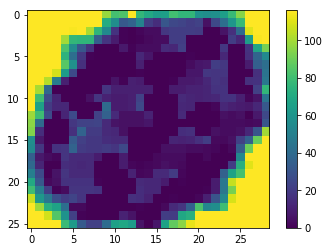

In [13]:
plt.imshow(bdata.sum(axis=2))
plt.colorbar()
plt.show()

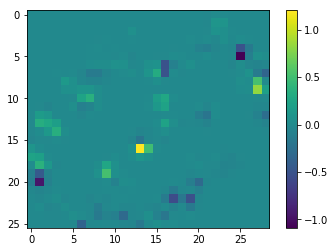

In [14]:
plt.imshow(cube[:,:,-1])
plt.colorbar()
plt.show()

### Getting Data

In [15]:
reverse = True
diagonal = False

In [16]:
if reverse:
    dataUF = cube.max() - cube + 1
    dataPH = cube.max() - cube + 1
else:
    dataUF = cube
    dataPH = cube - cube.min() + 1

### Generating Input File

In [17]:
if dataPH.dtype == np.float_:
    multiplier = 1e4
else:
    multiplier = 1

In [18]:
dataPH = (dataPH * multiplier).astype(int)

In [19]:
if reverse: 
    if diagonal:
        ainput = 'cube3dr.txt'
    else:
        ainput = 'cube3dr2.txt'
else:
    if diagonal:
        ainput = 'cube3d.txt'
    else:
        ainput = 'cube3d2.txt'

In [20]:
if diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(dataPH.shape))+'\n')
        for l in dataPH.shape:
            f.write(str(l)+'\n')
        for i in dataPH.flatten():
            f.write(str(i)+'\n')

In [21]:
if not diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(dataPH.shape))+'\n')
        for i in range(0, dataPH.shape[0]):
            for j in range(0, dataPH.shape[1]):
                for k in range(0, dataPH.shape[2]):
                    f.write('0 {} {} {} {}\n'.format(i, j, k, dataPH[i, j, k]))
                    if i+1<dataPH.shape[0]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i+1, j, k, 
                                                                  max(dataPH[i, j, k], dataPH[i+1, j, k])))
                    if j+1<dataPH.shape[1]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i, j+1, k, 
                                                                  max(dataPH[i, j, k], dataPH[i, j+1, k])))
                    if k+1<dataPH.shape[2]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i, j, k+1, 
                                                                  max(dataPH[i, j, k], dataPH[i, j, k+1])))

### Running Cubical

In [22]:
import subprocess

In [23]:
if diagonal:
    subprocess.run(['./perseusMac', 'cubtop', ainput, ainput[:-4]])
else:
    subprocess.run(['./perseusMac', 'nmfsimtop', ainput, ainput[:-4]])

### Reading Output File

In [24]:
if reverse: 
    if diagonal:
        aoutput = 'cube3dr_0.txt'
    else:
        aoutput = 'cube3dr2_0.txt'
else:
    if diagonal:
        aoutput = 'cube3d_0.txt'
    else:
        aoutput = 'cube3d2_0.txt'

In [25]:
pd2 = []
with open(aoutput) as f:
    for l in f.readlines():
        info = l.split()
        start = int(info[0]) / multiplier
        end = int(info[1]) / multiplier if int(info[1]) != -1 else -1
        pd2.append((start, end))
pd2 = sorted(pd2, key=lambda x:x[0])
pd2

[(1.0, -1),
 (1.6225, 4.4338),
 (1.7091, 4.3916),
 (1.7915, 4.3247),
 (1.8299, 4.3219),
 (1.8733, 4.3118),
 (1.8832, 4.3489),
 (1.9185, 4.2915),
 (1.9187, 4.362),
 (2.0005, 4.3047),
 (2.0192, 4.3074),
 (2.0376, 4.3145),
 (2.1226, 4.3517),
 (2.156, 4.4339),
 (2.1841, 4.2981),
 (2.2365, 4.3472),
 (2.2508, 4.2888),
 (2.2972, 4.3094),
 (2.3572, 4.334),
 (2.4052, 4.3616),
 (2.438, 4.3255),
 (2.4446, 4.3921),
 (2.4851, 4.2989),
 (2.4865, 4.3046),
 (2.5118, 4.299),
 (2.5485, 4.3314),
 (2.5491, 4.2476),
 (2.5713, 4.3862),
 (2.6422, 4.2994),
 (2.6583, 4.2793),
 (2.6677, 4.2768),
 (2.6684, 4.322),
 (2.6912, 4.3432),
 (2.694, 2.9197),
 (2.6979, 4.2991),
 (2.7062, 4.2707),
 (2.7084, 4.5107),
 (2.7092, 4.3043),
 (2.7289, 4.3468),
 (2.7418, 4.2877),
 (2.7551, 4.2843),
 (2.7558, 4.2796),
 (2.7581, 4.2641),
 (2.7594, 4.2817),
 (2.7694, 4.2345),
 (2.7878, 4.2596),
 (2.7946, 4.1306),
 (2.8066, 4.286),
 (2.8153, 4.3641),
 (2.8519, 4.2935),
 (2.8586, 4.2837),
 (2.8647, 4.2942),
 (2.8701, 4.1723),
 (2.8702

### Creating Pixel Objects

In [26]:
mat = []
for i in range(dataUF.shape[0]):
    aslice = []
    for j in range(dataUF.shape[1]):
        row = []
        for k in range(dataUF.shape[2]):
            element = dataUF[i][j][k]
            row.append(Pixel3D(i, j, k, element))
        aslice.append(row)
    mat.append(aslice)

In [27]:
arr = sorted([e for aslice in mat for row in aslice for e in row])
arr

[Pixel: [coordinates: (7, 26, 109); value: 1.0],
 Pixel: [coordinates: (17, 16, 50); value: 1.6225914694445485],
 Pixel: [coordinates: (17, 11, 89); value: 1.7091395488693912],
 Pixel: [coordinates: (9, 11, 89); value: 1.791572839698468],
 Pixel: [coordinates: (10, 20, 45); value: 1.8299566500498563],
 Pixel: [coordinates: (7, 19, 2); value: 1.8733908651776878],
 Pixel: [coordinates: (4, 14, 26); value: 1.8832028205845326],
 Pixel: [coordinates: (15, 12, 45); value: 1.9185031929045038],
 Pixel: [coordinates: (1, 10, 99); value: 1.9187258919384416],
 Pixel: [coordinates: (19, 18, 25); value: 2.0005346107197473],
 Pixel: [coordinates: (19, 18, 9); value: 2.0192304764043625],
 Pixel: [coordinates: (21, 12, 28); value: 2.0376425360538595],
 Pixel: [coordinates: (19, 12, 99); value: 2.1226520479535687],
 Pixel: [coordinates: (2, 12, 114); value: 2.156060319875492],
 Pixel: [coordinates: (10, 19, 47); value: 2.1841815567763847],
 Pixel: [coordinates: (14, 10, 62); value: 2.2365113190266315],

### Getting Neighbors for a Pixel

In [28]:
def append3DNeighbor(neighbors, x, y, z):
    if x < 0 or y < 0 or z < 0:
        return
    try:
        neighbors.append(mat[x][y][z])
    except:
        pass

In [29]:
def get_neighbors(pixel, diagonal=False):
    neighbors = []
    x = pixel.getX()
    y = pixel.getY()
    z = pixel.getZ()
    append3DNeighbor(neighbors, x-1, y, z)
    append3DNeighbor(neighbors, x+1, y, z)
    append3DNeighbor(neighbors, x, y-1, z)
    append3DNeighbor(neighbors, x, y+1, z)
    append3DNeighbor(neighbors, x, y, z-1)
    append3DNeighbor(neighbors, x, y, z+1)
    if diagonal:
        append3DNeighbor(neighbors, x-1, y-1, z-1)
        append3DNeighbor(neighbors, x-1, y-1, z)
        append3DNeighbor(neighbors, x-1, y-1, z+1)
        append3DNeighbor(neighbors, x-1, y, z-1)
        append3DNeighbor(neighbors, x-1, y, z+1)
        append3DNeighbor(neighbors, x-1, y+1, z-1)
        append3DNeighbor(neighbors, x-1, y+1, z)
        append3DNeighbor(neighbors, x-1, y+1, z+1)
        append3DNeighbor(neighbors, x, y+1, z+1)
        append3DNeighbor(neighbors, x, y-1, z+1)
        append3DNeighbor(neighbors, x, y+1, z-1)
        append3DNeighbor(neighbors, x, y-1, z-1)
        append3DNeighbor(neighbors, x+1, y-1, z-1)
        append3DNeighbor(neighbors, x+1, y-1, z)
        append3DNeighbor(neighbors, x+1, y-1, z+1)
        append3DNeighbor(neighbors, x+1, y, z-1)
        append3DNeighbor(neighbors, x+1, y, z+1)
        append3DNeighbor(neighbors, x+1, y+1, z-1)
        append3DNeighbor(neighbors, x+1, y+1, z)
        append3DNeighbor(neighbors, x+1, y+1, z+1)
    return neighbors

In [30]:
set([len(get_neighbors(pixel)) for pixel in arr])

{3, 4, 5, 6}

In [31]:
set([len(get_neighbors(pixel, True)) for pixel in arr])

{7, 11, 17, 26}

### Creating Topological Union-find

In [32]:
tuf = TopologicalUnionFind()
tuf

<UnionFind:
	elts=[],
	siz=[],
	par=[],
n_elts=0,n_comps=0>

In [33]:
for pixel in arr:
    tuf.add(pixel, pixel.getV())
    for neighbor in get_neighbors(pixel, diagonal):
        tuf.union(pixel, neighbor, pixel.getV())

In [34]:
pd = tuf.persistence_diagram()
pd

[(Pixel: [coordinates: (7, 26, 109); value: 1.0], 1.0, inf),
 (Pixel: [coordinates: (17, 16, 50); value: 1.6225914694445485],
  1.6225914694445485,
  4.433851553973097),
 (Pixel: [coordinates: (17, 11, 89); value: 1.7091395488693912],
  1.7091395488693912,
  4.391653401749635),
 (Pixel: [coordinates: (9, 11, 89); value: 1.791572839698468],
  1.791572839698468,
  4.324775680705084),
 (Pixel: [coordinates: (10, 20, 45); value: 1.8299566500498563],
  1.8299566500498563,
  4.321991721442963),
 (Pixel: [coordinates: (7, 19, 2); value: 1.8733908651776878],
  1.8733908651776878,
  4.311845705272127),
 (Pixel: [coordinates: (4, 14, 26); value: 1.8832028205845326],
  1.8832028205845326,
  4.3489557062074145),
 (Pixel: [coordinates: (15, 12, 45); value: 1.9185031929045038],
  1.9185031929045038,
  4.291504327524285),
 (Pixel: [coordinates: (1, 10, 99); value: 1.9187258919384416],
  1.9187258919384416,
  4.362099329675399),
 (Pixel: [coordinates: (19, 18, 25); value: 2.0005346107197473],
  2.0005

### Visualization

In [35]:
y = np.arange(0, len(pd))

In [36]:
if reverse:
    xmin = [cube.min() if np.isinf(f[2]) else cube.max() - f[2] + 1 for f in pd]
    xmax = [cube.max() - f[1] + 1 for f in pd]
    xlim = (max(xmax), min(xmin))
else:
    xmin = [f[1] for f in pd]
    xmax = [cube.max() if np.isinf(f[2]) else f[2] for f in pd]
    xlim = (min(xmin), max(xmax))

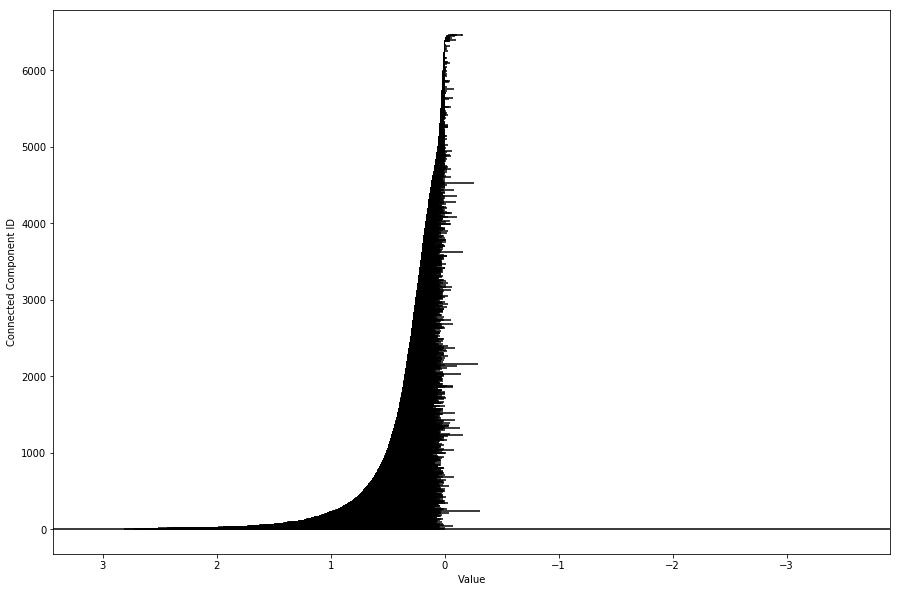

In [37]:
height = 2 + len(pd) // 10
height = 10 if height > 10 else height
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()

### Visualization2

In [38]:
y = np.arange(0, len(pd2))

In [39]:
if reverse:
    xmin = [cube.min() if f[1] == -1 else cube.max() - f[1] + 1 for f in pd2]
    xmax = [cube.max() - f[0] + 1 for f in pd2]
    xlim = (max(xmax), min(xmin))
else:
    xmin = [f[0] + cube.min() - 1 for f in pd2]
    xmax = [cube.max() if f[1] == -1 else f[1] + cube.min() - 1 for f in pd2]
    xlim = (min(xmin), max(xmax))

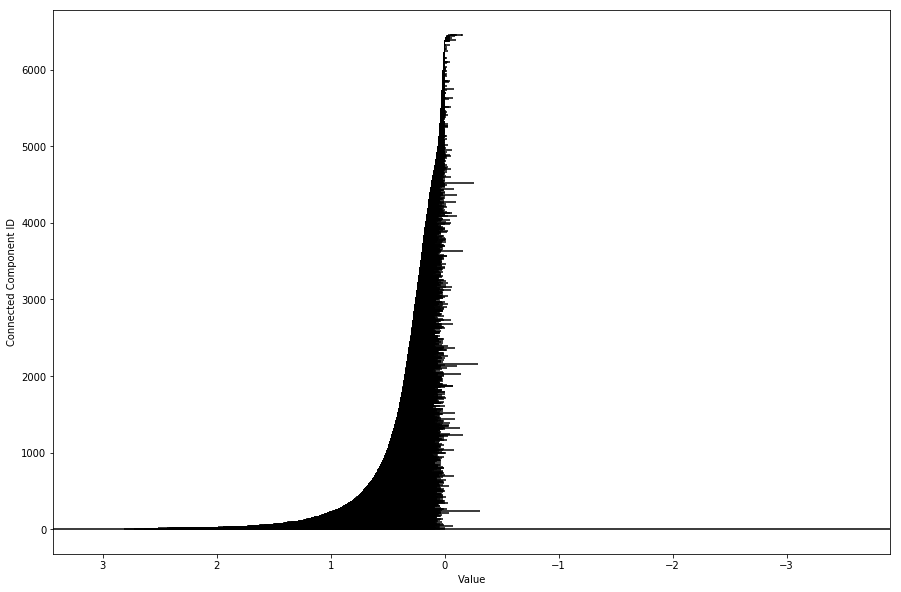

In [40]:
height = 2 + len(pd2) // 10
height = 10 if height > 10 else height
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()